FROM: https://www.kaggle.com/fnands/makegraphinput
# Graph creator
A graph is a relativly natural way of representing molecules, and many method make use of structuring the data in this way.

This kernel shows a basic example of one can structure our data as a graph.

Here we will create an array for our node values, and an adjacency matrix for our edge values.

(Note: One can argue whether an adjacency matrix is really the best way to go here as we have an undirected graph, and it is therefore a bit innefficienct ( n^2 as opposed to n(n-1)/2 ), but it is easy to work with)

This is by no means the fastest way of doing this, but it is straightforward and only has to be run once, and the output can then be used.

In [2]:
import tensorflow as tf
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.utils import shuffle
import os

/home/robmulla/anaconda3/envs/kaggle/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/robmulla/anaconda3/envs/kaggle/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/robmulla/anaconda3/envs/kaggle/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/robmulla/anaconda3/envs/kaggle/lib

In [3]:
# Make sure tf 2.0 alpha has been installed
print(tf.__version__)

1.13.1


In [4]:
#is it using the gpu?
tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
)

True

In [5]:
# datadir = "../data/"

# nodes_train     = np.load(datadir + "champs-basic-graph/nodes_train.npy" )
# in_edges_train  = np.load(datadir + "champs-basic-graph/in_edges_train.npy")
# out_edges_train = np.load(datadir + "champs-basic-graph/out_edges_train.npy" )

# nodes_test     = np.load(datadir + "champs-basic-graph/nodes_test.npy" )
# in_edges_test  = np.load(datadir + "champs-basic-graph/in_edges_test.npy")

In [6]:
# out_labels = out_edges_train.reshape(-1,out_edges_train.shape[1]*out_edges_train.shape[2],1)
# in_edges_train = in_edges_train.reshape(-1,in_edges_train.shape[1]*in_edges_train.shape[2],in_edges_train.shape[3])
# in_edges_test  = in_edges_test.reshape(-1,in_edges_test.shape[1]*in_edges_test.shape[2],in_edges_test.shape[3])

In [7]:
datadir = "../data/"

nodes_train     = np.load(datadir + "champs-basic-graph/nodes_train.npz" )['arr_0']
in_edges_train  = np.load(datadir + "champs-basic-graph/in_edges_train.npz")['arr_0']
out_edges_train = np.load(datadir + "champs-basic-graph/out_edges_train.npz" )['arr_0']

nodes_test     = np.load(datadir + "champs-basic-graph/nodes_test.npz" )['arr_0']
in_edges_test  = np.load(datadir + "champs-basic-graph/in_edges_test.npz")['arr_0']

out_labels = out_edges_train.reshape(-1,out_edges_train.shape[1]*out_edges_train.shape[2],1)
in_edges_train = in_edges_train.reshape(-1,in_edges_train.shape[1]*in_edges_train.shape[2],in_edges_train.shape[3])
in_edges_test  = in_edges_test.reshape(-1,in_edges_test.shape[1]*in_edges_test.shape[2],in_edges_test.shape[3])

In [8]:
nodes_train, in_edges_train, out_labels = shuffle(nodes_train, in_edges_train, out_labels)

In [30]:
out_labels[4]

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.0030668 ],
       [-0.02687448],
       [ 0.00838578],
       [-0.73191166],
       [-0.688731  ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [-0.7221862 ],
       [-0.6951495 ],
       [-0.7220378 ],
       [ 0.00153049],
       [-0.6203358 ],
       [-0.6764287 ],
       [-0.6680317 ],
       [-0

In [17]:
in_edges_train[0][3]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.36769882], dtype=float32)

In [24]:
out_edges_train[0][0]

array([[0.        ],
       [0.00395606],
       [0.0039544 ],
       [0.00397016],
       [0.00397182],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]], dtype=float32)

In [10]:
class Message_Passer_NNM(tf.keras.layers.Layer):
    def __init__(self, node_dim):
        super(Message_Passer_NNM, self).__init__()
        self.node_dim = node_dim
        self.nn = tf.keras.layers.Dense(units=self.node_dim*self.node_dim, activation=tf.nn.relu)#None)
      
    def call(self, node_j, edge_ij):
        
        # Embed the edge as a matrix
        A = self.nn(edge_ij)
        
        # Reshape so matrix mult can be done
        A = tf.reshape(A, [-1, self.node_dim, self.node_dim])
        node_j = tf.reshape(node_j, [-1, self.node_dim, 1])
        
        # Multiply edge matrix by node and shape into message list
        messages = tf.linalg.matmul(A, node_j)
        messages = tf.reshape(messages, [-1, tf.shape(edge_ij)[1], self.node_dim])

        return messages

In [11]:
class Message_Agg(tf.keras.layers.Layer):
    def __init__(self):
        super(Message_Agg, self).__init__()
    
    def call(self, messages):
        return tf.math.reduce_sum(messages, 2)

In [12]:
class Update_Func_GRU(tf.keras.layers.Layer):
    def __init__(self, state_dim):
        super(Update_Func_GRU, self).__init__()
        self.concat_layer = tf.keras.layers.Concatenate(axis=1)
        self.GRU = tf.keras.layers.GRU(state_dim)
        
    def call(self, old_state, agg_messages):
    
        # Remember node dim
        n_nodes  = tf.shape(old_state)[1]
        node_dim = tf.shape(old_state)[2]
        
        # Reshape so GRU can be applied, concat so old_state and messages are in sequence
        old_state = tf.reshape(old_state, [-1, 1, tf.shape(old_state)[-1]])
        agg_messages = tf.reshape(agg_messages, [-1, 1, tf.shape(agg_messages)[-1]])
        concat = self.concat_layer([old_state, agg_messages])
        
        # Apply GRU and then reshape so it can be returned
        activation = self.GRU(concat)
        activation = tf.reshape(activation, [-1, n_nodes, node_dim])
        
        return activation

In [13]:
# Define the final output layer 
class Edge_Regressor(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Edge_Regressor, self).__init__()
        self.concat_layer = tf.keras.layers.Concatenate()
        self.hidden_layer_1 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.hidden_layer_2 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=1, activation=None)

        
    def call(self, nodes, edges):
            
        # Remember node dims
        n_nodes  = tf.shape(nodes)[1]
        node_dim = tf.shape(nodes)[2]
        
        # Tile and reshape to match edges
        state_i = tf.reshape(tf.tile(nodes, [1, 1, n_nodes]),[-1,n_nodes*n_nodes, node_dim ])
        state_j = tf.tile(nodes, [1, n_nodes, 1])
        
        # concat edges and nodes and apply MLP
        concat = self.concat_layer([state_i, edges, state_j])
        activation_1 = self.hidden_layer_1(concat)  
        activation_2 = self.hidden_layer_2(activation_1)

        return self.output_layer(activation_2)

In [14]:
# Define a single message passing layer
class MP_Layer(tf.keras.layers.Layer):
    def __init__(self, state_dim):
        super(MP_Layer, self).__init__(self)
        self.message_passers  = Message_Passer_NNM(node_dim = state_dim) 
        self.message_aggs    = Message_Agg()
        self.update_functions = Update_Func_GRU(state_dim = state_dim)
        
        self.state_dim = state_dim         
        self.batch_norm = tf.keras.layers.BatchNormalization() 

    def call(self, nodes, edges, mask):

        nodes
        edges
        
        n_nodes  = tf.shape(nodes)[1]
        node_dim = tf.shape(nodes)[2]
        
        state_j = tf.tile(nodes, [1, n_nodes, 1])

        messages  = self.message_passers(state_j, edges)

        # Do this to ignore messages from non-existant nodes
        masked =  tf.math.multiply(messages, mask)
        
        masked = tf.reshape(masked, [tf.shape(messages)[0], n_nodes, n_nodes, node_dim])

        agg_m = self.message_aggs(masked)
        
        updated_nodes = self.update_functions(nodes, agg_m)
        
        nodes_out = updated_nodes
        # Batch norm seems not to work. 
        #nodes_out = self.batch_norm(updated_nodes)
        
        return nodes_out

In [15]:
adj_input = tf.keras.Input(shape=(None,), name='adj_input')
nod_input = tf.keras.Input(shape=(None,), name='nod_input')
class MPNN(tf.keras.Model):
    def __init__(self, out_int_dim, state_dim, T):
        super(MPNN, self).__init__(self)   
        self.T = T
        self.embed = tf.keras.layers.Dense(units=state_dim, activation=tf.nn.relu)
        self.MP = MP_Layer( state_dim)     
        self.edge_regressor  = Edge_Regressor(out_int_dim)

        
    def call(self, inputs =  [adj_input, nod_input]):
      
      
        nodes            = inputs['nod_input']
        edges            = inputs['adj_input']

        # Get distances, and create mask wherever 0 (i.e. non-existant nodes)
        # This also masks node self-interactions...
        # This assumes distance is last
        len_edges = tf.shape(edges)[-1]
        
        _, x = tf.split(edges, [len_edges -1, 1], 2)
        mask =  tf.where(tf.equal(x, 0), x, tf.ones_like(x))
        
        # Embed node to be of the chosen node dimension (you can also just pad)
        nodes = self.embed(nodes) 
        
        # Run the T message passing steps
        for mp in range(self.T):
            nodes =  self.MP(nodes, edges, mask)
        
        # Regress the output values
        con_edges = self.edge_regressor(nodes, edges)
        
        
        return con_edges
        

In [16]:
def mse(orig , preds):
 
    # Mask values for which no scalar coupling exists
    mask  = tf.where(tf.equal(orig, 0), orig, tf.ones_like(orig))

    nums  = tf.boolean_mask(orig,  mask)
    preds = tf.boolean_mask(preds,  mask)


    reconstruction_error = tf.reduce_mean(tf.square(tf.subtract(nums, preds)))


    return reconstruction_error

In [17]:
def log_mse(orig , preds):
 
    # Mask values for which no scalar coupling exists
    mask  = tf.where(tf.equal(orig, 0), orig, tf.ones_like(orig))

    nums  = tf.boolean_mask(orig,  mask)
    preds = tf.boolean_mask(preds,  mask)


    reconstruction_error = tf.math.log(tf.reduce_mean(tf.square(tf.subtract(nums, preds))))


    return reconstruction_error

In [18]:
def mae(orig , preds):
 
    # Mask values for which no scalar coupling exists
    mask  = tf.where(tf.equal(orig, 0), orig, tf.ones_like(orig))

    nums  = tf.boolean_mask(orig,  mask)
    preds = tf.boolean_mask(preds,  mask)


    reconstruction_error = tf.reduce_mean(tf.abs(tf.subtract(nums, preds)))


    return reconstruction_error

In [19]:
def log_mae(orig , preds):
 
    # Mask values for which no scalar coupling exists
    mask  = tf.where(tf.equal(orig, 0), orig, tf.ones_like(orig))

    nums  = tf.boolean_mask(orig,  mask)
    preds = tf.boolean_mask(preds,  mask)

    reconstruction_error = tf.math.log(tf.reduce_mean(tf.abs(tf.subtract(nums, preds))))

    return reconstruction_error

In [20]:
learning_rate = 0.001
def step_decay(epoch):
    initial_lrate = learning_rate
    drop = 0.1
    epochs_drop = 15.0
    lrate = initial_lrate * np.power(drop,  
           np.floor((epoch)/epochs_drop))
    tf.print("Learning rate: ", lrate)
    return lrate

lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 15, restore_best_weights=True)

#lrate  =  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
#                              patience=5, min_lr=0.00001, verbose = 1)

opt = tf.optimizers.Adam(learning_rate=learning_rate)

In [21]:
mpnn = MPNN(out_int_dim = 512, state_dim = 128, T = 5)
mpnn.compile(opt, log_mse, metrics = [mae, log_mae])

In [22]:
train_size = int(len(out_labels)*0.8)
batch_size = 10
epochs = 20

In [23]:
mpnn.call({'adj_input' : in_edges_train[:10], 'nod_input': nodes_train[:10]})

<tf.Tensor: id=1118, shape=(10, 841, 1), dtype=float32, numpy=
array([[[8.1583898e-04],
        [5.5706352e-02],
        [1.6626149e-02],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[1.2012941e-03],
        [5.5526808e-02],
        [1.7323753e-02],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[8.5169269e-04],
        [5.6613032e-02],
        [1.8004354e-02],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       ...,

       [[7.9878839e-04],
        [2.0163244e-02],
        [1.6800225e-02],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[7.4294326e-04],
        [5.6236036e-02],
        [1.8362502e-02],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[7.7000288e-05],
        [2.0549884e-02],
        [1.6717566e-02],
        ...,
        [0.

In [24]:
mpnn.fit({'adj_input' : in_edges_train[:train_size],
          'nod_input': nodes_train[:train_size]},
         y = out_labels[:train_size],
         batch_size = batch_size,
         epochs = epochs, 
         callbacks = [lrate, stop_early],
         use_multiprocessing = True,
         initial_epoch = 0,
         verbose = 2, 
         validation_data = ({'adj_input' : in_edges_train[train_size:],
                             'nod_input': nodes_train[train_size:]},
                            out_labels[train_size:])
        )

W0801 20:39:57.817355 139936906143552 deprecation.py:323] From /home/robmulla/anaconda3/envs/tf2/lib/python3.7/site-packages/tensorflow/python/ops/array_grad.py:425: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.


Learning rate:  0.001
Epoch 1/20
68002/68002 - 1686s - loss: -8.1925e+00 - mae: 0.0127 - log_mae: -4.4653e+00 - val_loss: -9.0891e+00 - val_mae: 0.0077 - val_log_mae: -4.8893e+00
Learning rate:  0.001
Epoch 2/20
68002/68002 - 1675s - loss: -9.0771e+00 - mae: 0.0075 - log_mae: -4.9059e+00 - val_loss: -9.4319e+00 - val_mae: 0.0065 - val_log_mae: -5.0600e+00
Learning rate:  0.001
Epoch 3/20
68002/68002 - 1675s - loss: -9.3952e+00 - mae: 0.0064 - log_mae: -5.0650e+00 - val_loss: -9.5179e+00 - val_mae: 0.0064 - val_log_mae: -5.0787e+00
Learning rate:  0.001
Epoch 4/20
68002/68002 - 1674s - loss: -9.6165e+00 - mae: 0.0057 - log_mae: -5.1773e+00 - val_loss: -9.5387e+00 - val_mae: 0.0058 - val_log_mae: -5.1791e+00
Learning rate:  0.001
Epoch 5/20
68002/68002 - 1672s - loss: -9.7670e+00 - mae: 0.0053 - log_mae: -5.2525e+00 - val_loss: -9.9672e+00 - val_mae: 0.0050 - val_log_mae: -5.3262e+00
Learning rate:  0.001
Epoch 6/20
68002/68002 - 1676s - loss: -9.8745e+00 - mae: 0.0050 - log_mae: -5.3061

In [25]:
preds = mpnn.predict({'adj_input' : in_edges_test, 'nod_input': nodes_test})

In [26]:
np.save("preds_kernel.npy" , preds)

In [27]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

test_group = test.groupby('molecule_name')

scale_min  = train['scalar_coupling_constant'].min()
scale_max = train['scalar_coupling_constant'].max()
scale_mid = (scale_max + scale_min)/2
scale_norm = scale_max - scale_mid

In [28]:
def make_outs(test_group, preds):
    i = 0
    x = np.array([])
    for test_gp, preds in zip(test_group, preds):
        if (not i%1000):
            print(i)

        gp = test_gp[1]
        
        x = np.append(x, (preds[gp['atom_index_0'].values, gp['atom_index_1'].values] + preds[gp['atom_index_1'].values, gp['atom_index_0'].values])/2.0)
        
        i = i+1
    return x

In [29]:
max_size = 29
preds = preds.reshape((-1,max_size, max_size))

In [30]:
out_unscaled = make_outs(test_group, preds)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000


In [31]:
test['scalar_coupling_constant'] = out_unscaled
test['scalar_coupling_constant'] = test['scalar_coupling_constant']*scale_norm + scale_mid
test[['id','scalar_coupling_constant']].to_csv('submission_mpnn-001.csv', index=False)

# Try to predict on train?

In [34]:
preds_tr = mpnn.predict({'adj_input' : in_edges_train, 'nod_input': nodes_train})

In [35]:
max_size = 29
preds_tr = preds_tr.reshape((-1,max_size, max_size))

In [36]:
train_group = train.groupby('molecule_name')

out_unscaled_tr = make_outs(train_group, preds)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000


In [38]:
train['scalar_coupling_constant'] = out_unscaled_tr
train['scalar_coupling_constant'] = train['scalar_coupling_constant']*scale_norm + scale_mid
train[['id','scalar_coupling_constant']].to_csv('train_mpnn-001.csv', index=False)

ValueError: Length of values does not match length of index

In [40]:
len(out_unscaled_tr)

2348348

In [41]:
train.shape

(4658147, 6)

In [42]:
test.shape

(2505542, 6)

# Compare Submission

In [44]:
b035 = pd.read_csv('../submissions/BLEND035_sub_-2.00491CV.csv')

In [46]:
test['b035'] = b035['scalar_coupling_constant']

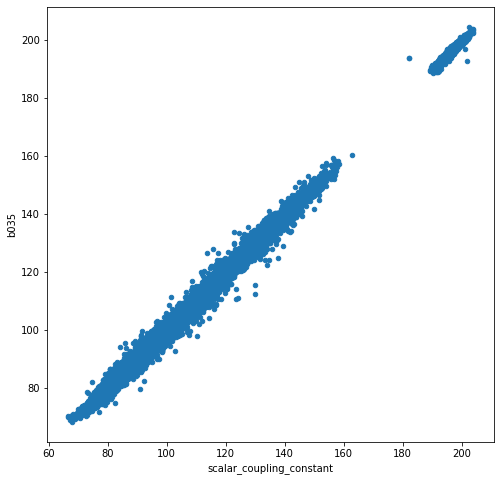

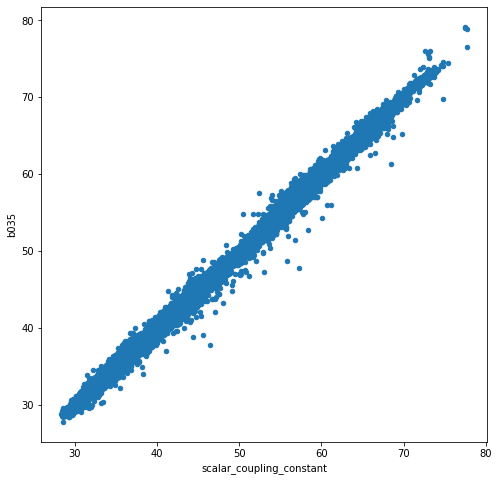

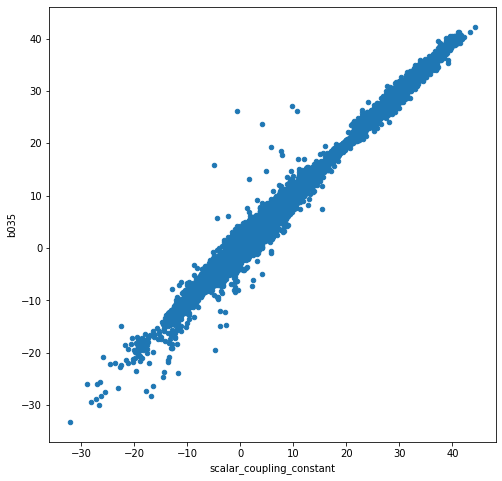

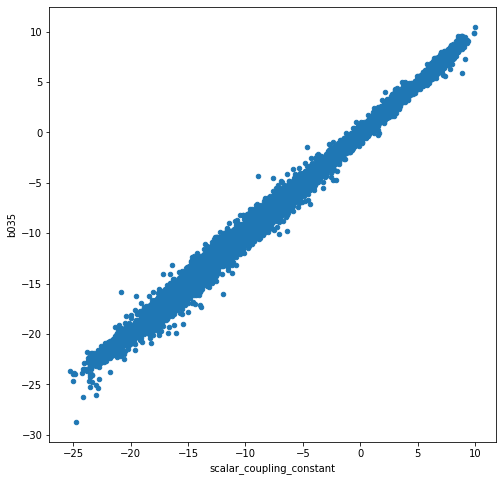

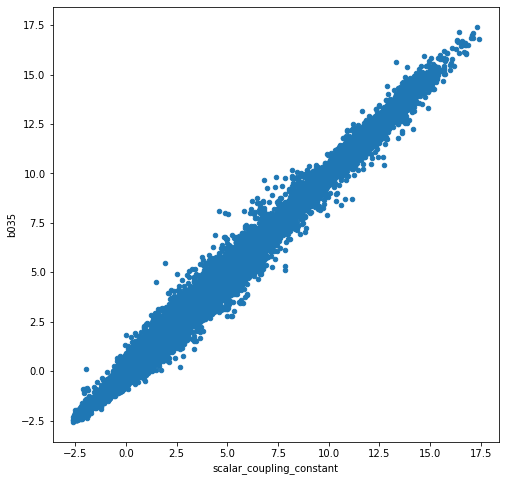

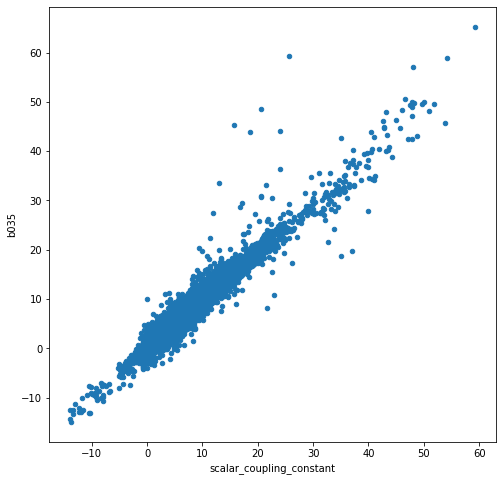

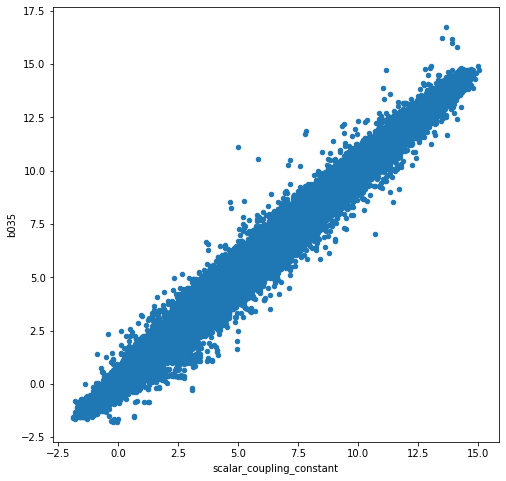

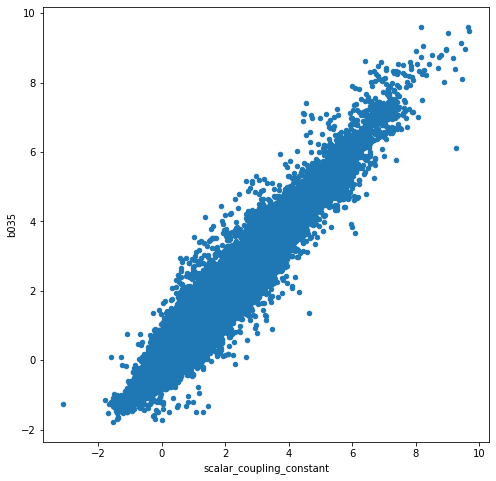

In [50]:
import matplotlib.pylab as plt
for i, d in test.groupby('type'):
    d.plot(x='scalar_coupling_constant', y='b035', kind='scatter', figsize=(8, 8))
    plt.show()